# Examples to get output at a cantonal level 

In [1]:
import numpy as np
import pandas as pd
#from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
import pickle
import palettable
from scipy.sparse import csr_matrix, vstack
from scipy.optimize import curve_fit
import sys 
from netCDF4 import num2date, date2num
import xarray as xr
from netCDF4 import Dataset

sys.path.append('../../')

from climada.engine import Impact
from climada.entity import Exposures
from climada.hazard import Hazard
from src.impact_calculation.impact_heat import *
from src.util.plots import *

fig_dir = '../../data_analysis/figures/'

2020-12-18 14:26:58,291 - climada - DEBUG - Loading default config file: /Users/zeliestalhanske/Documents/GitHub/climada_python/climada/conf/defaults.conf


In [32]:
def canton_plots(canton, impact_type, category_maps='Over 75', scenario_maps='RCP85', year_maps=2050):
    unit = {'mortality':'Heat-Related Deaths [#]', 'productivity':'Productivity Loss [Million CHF]'}
    pickle_in = \
    open(''.join(['../../output/',impact_type,'_results/impact_CH_values_99mc5.pickle']),'rb')
    impacts = pickle.load(pickle_in)

    directory_exposures = '../../input_data/exposures/'
    exposures = {}
    for code, category in {'O': 'Over 75', 'U': 'Under 75'}.items():    
        exposures_file = ''.join([directory_exposures, 'exposures_mortality_ch_', code,'2.h5'])
        exposures[category] = Exposures()
        exposures[category].read_hdf5(exposures_file)
        exposures[category]['value'] = exposures[category]['value']*exposures[category]['total_population_canton']
        #exposures[category] = exposures[category][exposures[category]['canton']=='Zürich']
        #exposures[category] = Exposures(exposures[category])
        exposures[category].check()
    if impact_type == 'productivity':
        impacts.costs_in_millions()

    agg_impact_zurich = impacts.calculate_impact_agg_canton(canton, exposures, impacts_mortality.categories)

    plot_impacts_heat(agg_impact_zurich, unit=unit[impact_type], impact_type=impact_type, color=['yellowgreen', 'darkolivegreen'], labels_cat=['<75 Years', '≥ 75 Years'], uncertainty=False)

    categories_code = {'Over 75':'O', 'Under 75':'U'}
    cm = palettable.cartocolors.sequential.Emrld_7.mpl_colormap

    impact = impacts_mortality.matrix_as_impact(impacts_mortality.median_impact_matrices[scenario_maps][year_maps][category], exposures[category], percentage=True, unit='%', canton=canton)
    impact.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, extend='max')

    impact.plot_basemap_impact_exposure(pop_name=False, cmap=cm, extend='max', s=1)

    #plt.savefig(''.join([fig_dir,'spatial_impact_2050_o75.pdf']),bbox_inches='tight')   

## Example Zurich

2020-12-18 14:51:44,118 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_O2.h5
2020-12-18 14:51:46,176 - climada.entity.exposures.base - INFO - centr_ not set.
2020-12-18 14:51:46,176 - climada.entity.exposures.base - INFO - deductible not set.
2020-12-18 14:51:46,177 - climada.entity.exposures.base - INFO - cover not set.
2020-12-18 14:51:46,178 - climada.entity.exposures.base - INFO - category_id not set.
2020-12-18 14:51:46,179 - climada.entity.exposures.base - INFO - region_id not set.
2020-12-18 14:51:46,181 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_U2.h5
2020-12-18 14:51:48,209 - climada.entity.exposures.base - INFO - centr_ not set.
2020-12-18 14:51:48,210 - climada.entity.exposures.base - INFO - deductible not set.
2020-12-18 14:51:48,210 - climada.entity.exposures.base - INFO - cover not set.
2020-12-18 14:51:48,211 - climada.entity.exposures.base - INFO - category_id not

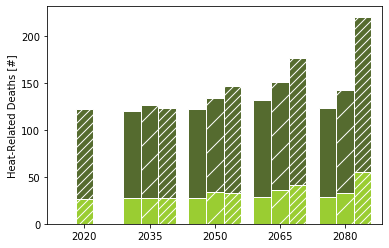

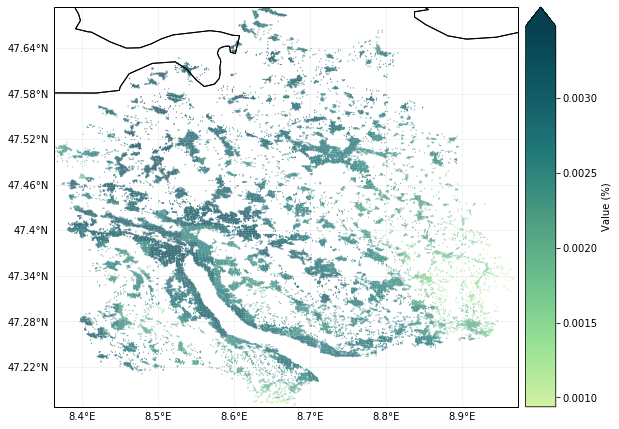

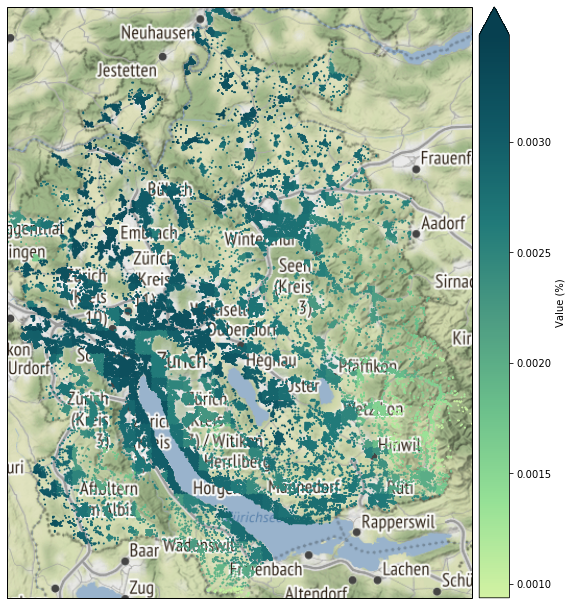

In [33]:
canton_plots('Zürich', 'mortality')

2020-12-18 14:40:25,667 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_O2.h5
2020-12-18 14:40:27,308 - climada.entity.exposures.base - INFO - centr_ not set.
2020-12-18 14:40:27,308 - climada.entity.exposures.base - INFO - deductible not set.
2020-12-18 14:40:27,309 - climada.entity.exposures.base - INFO - cover not set.
2020-12-18 14:40:27,309 - climada.entity.exposures.base - INFO - category_id not set.
2020-12-18 14:40:27,310 - climada.entity.exposures.base - INFO - region_id not set.
2020-12-18 14:40:27,312 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_U2.h5
2020-12-18 14:40:29,422 - climada.entity.exposures.base - INFO - centr_ not set.
2020-12-18 14:40:29,422 - climada.entity.exposures.base - INFO - deductible not set.
2020-12-18 14:40:29,423 - climada.entity.exposures.base - INFO - cover not set.
2020-12-18 14:40:29,423 - climada.entity.exposures.base - INFO - category_id not

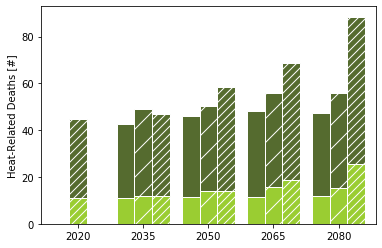

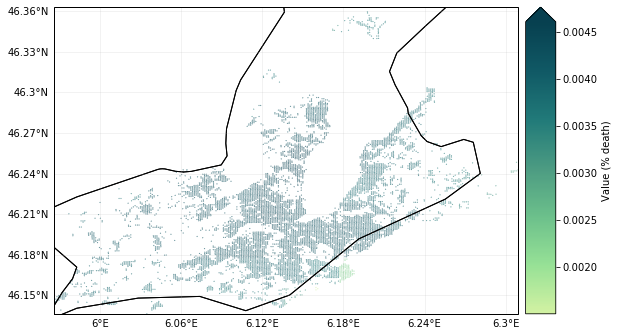

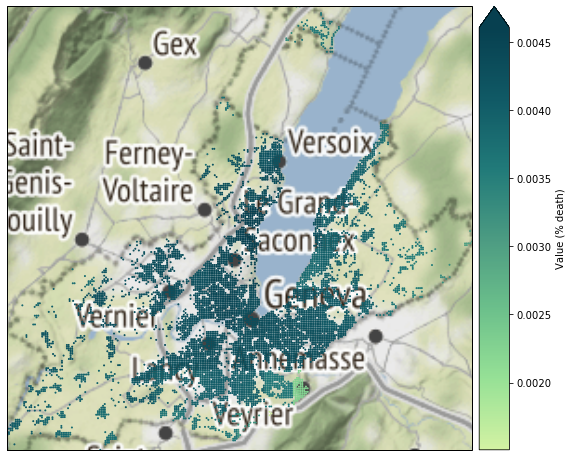

In [23]:
canton_plots(canton='Genève')